## Цель практической работы

Закрепить на практике знания о процедуре обучения решающего дерева.


## Что входит в практическую работу

*  Загрузка датасета.
*  Поиск оптимального порога для выбранного признака в корне дерева.
*  Поиск оптимальной пары (признак, порог) в корне дерева.
*  Визуальный анализ первого разбиения.

## Что нужно сделать
Постройте первое разбиение объектов на две части в решающем дереве самостоятельно, без использования готовых моделей из библиотек Python (исходя из максимизации Information Gain или минимизации аналогичной функции).

Эту практическую работу не нужно сдавать на проверку. Выполните все задания и сверьтесь с ответами ниже.

В этом задании вы будете решать задачу регрессии (ведь решающее дерево можно применять и в задачах классификации) — предсказывать стоимость домов по их характеристикам.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing(as_frame=True)

In [3]:
X = housing['data']
y = housing['target']

print(f"Data shape: {X.shape}")
X.head()

Data shape: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

$R_m$ — множество объектов в разбиваемой вершине, $j$ — номер признака, по которому происходит разбиение, $t$ — порог разбиения.

Можно вычислять Information Gain, а можно считать ошибку:

$$ Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t} $$
$R_\ell$ — множество объектов в левом поддереве, $R_r$ — множество объектов в правом поддереве.

$H(R)$ — критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

Реализуйте подсчёт критерия ошибки. Для этого реализуйте функции для подсчёта значения критерия информативности, а также для разбиения вершины.

Разбейте данные на тренировочную и тестовую части. В тестовую часть отправьте четверть всех данных. Зафиксируйте random_state при разбиении.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

Чтобы было удобно сортировать объекты вместе с целевой переменной, 
допишем target в таблицу X_train.

In [6]:
X_train["target"] = y_train

C:\Users\Rashid\AppData\Local\Temp/ipykernel_15740/534846036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["target"] = y_train


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 14414 to 12116
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
 8   target      15480 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Возьмём для примера признак AveRooms и подберём для него оптимальный порог.

Для удобства перебора порога отсортируем по этому признаку таблицу.

In [8]:
X_train.sort_values("AveRooms", inplace=True)

C:\Users\Rashid\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5916,2.8750,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.375
17820,1.0938,20.0,1.130435,1.043478,120.0,1.739130,37.37,-121.90,1.875
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11,1.250
4552,1.0769,52.0,1.260870,1.163043,171.0,1.858696,34.04,-118.24,1.125


In [10]:
X_train.shape

(15480, 9)

In [11]:
X_train.shape[0]

15480

Переберите в цикле все возможные пороги для разбиения тренировочных данных по признаку AveRooms.

Для каждого разбиения необходимо вычислить ошибку Q: сначала для правого и левого поддеревьев вычисляем критерий информативности (дисперсию таргета), затем складываем полученные значения с весами.

In [12]:
Qs = [] # список ошибок для каждого порога

col_idx = X_train.columns.get_loc('AveRooms')
for i in range(X_train.shape[0]):
    threshold = X_train.iloc[i, col_idx]
    print('threshold=', threshold)
    #qual = # вычислите Q
    #Qs.append(qual)

threshold= 0.8461538461538461
threshold= 1.0
threshold= 1.1304347826086956
threshold= 1.1304347826086956
threshold= 1.2608695652173914
threshold= 1.3784860557768925
threshold= 1.4657534246575343
threshold= 1.64
threshold= 1.6544401544401544
threshold= 1.6785714285714286
threshold= 1.6807738814993953
threshold= 1.708994708994709
threshold= 1.7142857142857142
threshold= 1.7482866043613707
threshold= 1.750814332247557
threshold= 1.7680250783699059
threshold= 1.7845303867403315
threshold= 1.819277108433735
threshold= 1.8247191011235955
threshold= 1.8680738786279683
threshold= 1.875
threshold= 1.8850574712643677
threshold= 1.9020866773675762
threshold= 1.9680511182108626
threshold= 1.972644376899696
threshold= 1.9853372434017595
threshold= 1.9865470852017937
threshold= 2.0
threshold= 2.0087336244541483
threshold= 2.0153452685421995
threshold= 2.018348623853211
threshold= 2.0207253886010363
threshold= 2.0327380952380953
threshold= 2.0330188679245285
threshold= 2.0420499342969776
threshold= 2

threshold= 3.2066666666666666
threshold= 3.208398133748056
threshold= 3.2086553323029365
threshold= 3.208791208791209
threshold= 3.208823529411765
threshold= 3.2090032154340835
threshold= 3.2091836734693877
threshold= 3.2094763092269325
threshold= 3.2142857142857144
threshold= 3.2144578313253014
threshold= 3.217506631299735
threshold= 3.217815741305674
threshold= 3.218
threshold= 3.2180579216354346
threshold= 3.218390804597701
threshold= 3.2184412733260155
threshold= 3.2188449848024314
threshold= 3.2203098106712567
threshold= 3.2209567198177678
threshold= 3.2213225371120107
threshold= 3.2215799614643545
threshold= 3.2220543806646527
threshold= 3.2228047182175623
threshold= 3.2241935483870967
threshold= 3.2254901960784315
threshold= 3.226973684210526
threshold= 3.2270531400966185
threshold= 3.227146814404432
threshold= 3.2289156626506026
threshold= 3.2296918767507004
threshold= 3.2301255230125525
threshold= 3.2302631578947367
threshold= 3.2325581395348837
threshold= 3.2336448598130842
t

threshold= 3.7938553022794848
threshold= 3.7939481268011526
threshold= 3.7943548387096775
threshold= 3.7947454844006567
threshold= 3.795238095238095
threshold= 3.795620437956204
threshold= 3.796078431372549
threshold= 3.7965970610982214
threshold= 3.796833773087071
threshold= 3.796875
threshold= 3.797752808988764
threshold= 3.797909407665505
threshold= 3.798076923076923
threshold= 3.79831045406547
threshold= 3.7984790874524714
threshold= 3.7992700729927007
threshold= 3.7995169082125604
threshold= 3.8
threshold= 3.8004926108374386
threshold= 3.800711743772242
threshold= 3.8008595988538683
threshold= 3.8009049773755654
threshold= 3.8012048192771086
threshold= 3.8017241379310347
threshold= 3.8017543859649123
threshold= 3.801857585139319
threshold= 3.802281368821293
threshold= 3.8026315789473686
threshold= 3.8029661016949152
threshold= 3.8038379530916844
threshold= 3.804195804195804
threshold= 3.804395604395604
threshold= 3.804560260586319
threshold= 3.8046783625730995
threshold= 3.8046875

threshold= 4.040697674418604
threshold= 4.04102096627165
threshold= 4.041095890410959
threshold= 4.042402826855124
threshold= 4.042813455657492
threshold= 4.043010752688172
threshold= 4.043307086614173
threshold= 4.043333333333333
threshold= 4.043731778425656
threshold= 4.044155844155844
threshold= 4.044822256568779
threshold= 4.045725646123261
threshold= 4.046153846153846
threshold= 4.0462633451957295
threshold= 4.04679802955665
threshold= 4.046948356807512
threshold= 4.047058823529412
threshold= 4.0476190476190474
threshold= 4.047817047817047
threshold= 4.047835990888383
threshold= 4.047970479704797
threshold= 4.048387096774194
threshold= 4.049079754601227
threshold= 4.049166666666666
threshold= 4.049242424242424
threshold= 4.0492610837438425
threshold= 4.049306625577812
threshold= 4.04969696969697
threshold= 4.050675675675675
threshold= 4.050675675675675
threshold= 4.050724637681159
threshold= 4.050964187327824
threshold= 4.050970873786408
threshold= 4.051020408163265
threshold= 4.0

threshold= 4.284403669724771
threshold= 4.2844311377245505
threshold= 4.2845188284518825
threshold= 4.284722222222222
threshold= 4.285163776493256
threshold= 4.285198555956678
threshold= 4.285266457680251
threshold= 4.285285285285285
threshold= 4.285333333333333
threshold= 4.2853535353535355
threshold= 4.285539215686274
threshold= 4.285714285714286
threshold= 4.285714285714286
threshold= 4.285714285714286
threshold= 4.285714285714286
threshold= 4.285957446808511
threshold= 4.286624203821656
threshold= 4.286681715575621
threshold= 4.28695652173913
threshold= 4.287179487179487
threshold= 4.287390029325513
threshold= 4.287394957983193
threshold= 4.287515762925599
threshold= 4.287846481876333
threshold= 4.287878787878788
threshold= 4.289137380191693
threshold= 4.289179104477612
threshold= 4.289377289377289
threshold= 4.289393939393939
threshold= 4.2894736842105265
threshold= 4.2896825396825395
threshold= 4.289699570815451
threshold= 4.29
threshold= 4.290010741138561
threshold= 4.2900641025

threshold= 4.442906574394463
threshold= 4.442942942942943
threshold= 4.442953020134228
threshold= 4.442982456140351
threshold= 4.443037974683544
threshold= 4.443624868282402
threshold= 4.443645083932854
threshold= 4.443661971830986
threshold= 4.443661971830986
threshold= 4.443804034582133
threshold= 4.444444444444445
threshold= 4.444794952681388
threshold= 4.444891980959356
threshold= 4.445333333333333
threshold= 4.44543429844098
threshold= 4.445544554455446
threshold= 4.44559585492228
threshold= 4.445972495088409
threshold= 4.446428571428571
threshold= 4.446428571428571
threshold= 4.446511627906977
threshold= 4.447368421052632
threshold= 4.4475524475524475
threshold= 4.4487394957983195
threshold= 4.4489051094890515
threshold= 4.448936170212766
threshold= 4.448979591836735
threshold= 4.449111470113086
threshold= 4.4491525423728815
threshold= 4.449197860962567
threshold= 4.45
threshold= 4.45
threshold= 4.450704225352113
threshold= 4.451882845188284
threshold= 4.4520547945205475
threshol

threshold= 4.639815880322209
threshold= 4.639846743295019
threshold= 4.639908256880734
threshold= 4.64
threshold= 4.64
threshold= 4.640148011100832
threshold= 4.640919366993217
threshold= 4.641255605381166
threshold= 4.6415094339622645
threshold= 4.641791044776119
threshold= 4.641935483870967
threshold= 4.64203233256351
threshold= 4.642126789366054
threshold= 4.642714570858283
threshold= 4.6428134556574925
threshold= 4.642857142857143
threshold= 4.643020594965675
threshold= 4.643086816720257
threshold= 4.643097643097643
threshold= 4.6434540389972145
threshold= 4.643867924528302
threshold= 4.643939393939394
threshold= 4.6440677966101696
threshold= 4.644230769230769
threshold= 4.644628099173554
threshold= 4.644699140401146
threshold= 4.6450777202072535
threshold= 4.645320197044335
threshold= 4.645783132530121
threshold= 4.645796064400716
threshold= 4.646118721461187
threshold= 4.646983311938382
threshold= 4.646987951807229
threshold= 4.647058823529412
threshold= 4.647058823529412
thresho

threshold= 4.814634146341463
threshold= 4.814814814814815
threshold= 4.814814814814815
threshold= 4.814814814814815
threshold= 4.814814814814815
threshold= 4.815013404825737
threshold= 4.815195071868583
threshold= 4.815483870967742
threshold= 4.815561959654179
threshold= 4.8159090909090905
threshold= 4.816115702479339
threshold= 4.816326530612245
threshold= 4.816326530612245
threshold= 4.816770186335404
threshold= 4.816770186335404
threshold= 4.816901408450704
threshold= 4.817097415506958
threshold= 4.8173515981735155
threshold= 4.817472698907956
threshold= 4.817610062893082
threshold= 4.817767653758542
threshold= 4.818318318318318
threshold= 4.81858407079646
threshold= 4.818604651162791
threshold= 4.818627450980392
threshold= 4.818791946308725
threshold= 4.819018404907975
threshold= 4.819070904645477
threshold= 4.819444444444445
threshold= 4.819787985865724
threshold= 4.82051282051282
threshold= 4.82054890921886
threshold= 4.8210227272727275
threshold= 4.821138211382114
threshold= 4.8

threshold= 5.02803738317757
threshold= 5.028455284552845
threshold= 5.028616852146264
threshold= 5.02869757174393
threshold= 5.029007633587787
threshold= 5.029227557411273
threshold= 5.029411764705882
threshold= 5.029545454545454
threshold= 5.0296495956873315
threshold= 5.029885057471264
threshold= 5.029900332225914
threshold= 5.03
threshold= 5.03
threshold= 5.030120481927711
threshold= 5.030120481927711
threshold= 5.030508474576271
threshold= 5.030555555555556
threshold= 5.03074433656958
threshold= 5.030821917808219
threshold= 5.030973451327434
threshold= 5.031390134529148
threshold= 5.031578947368421
threshold= 5.032154340836013
threshold= 5.032731376975169
threshold= 5.033088235294118
threshold= 5.033690658499235
threshold= 5.033846153846154
threshold= 5.0339943342776206
threshold= 5.034129692832765
threshold= 5.034129692832765
threshold= 5.03416149068323
threshold= 5.034412955465587
threshold= 5.03494623655914
threshold= 5.034979423868313
threshold= 5.035046728971962
threshold= 5.0

threshold= 5.181500872600349
threshold= 5.181818181818182
threshold= 5.181818181818182
threshold= 5.181818181818182
threshold= 5.182080924855492
threshold= 5.182222222222222
threshold= 5.183361629881155
threshold= 5.183673469387755
threshold= 5.1837160751565765
threshold= 5.183783783783784
threshold= 5.183839479392625
threshold= 5.183908045977011
threshold= 5.184049079754601
threshold= 5.184065934065934
threshold= 5.184275184275184
threshold= 5.184568835098336
threshold= 5.184729064039409
threshold= 5.184824902723736
threshold= 5.185425101214575
threshold= 5.185552407932011
threshold= 5.185667752442996
threshold= 5.185792349726776
threshold= 5.186131386861314
threshold= 5.1861702127659575
threshold= 5.186206896551724
threshold= 5.186264308012487
threshold= 5.186274509803922
threshold= 5.186335403726708
threshold= 5.186653771760155
threshold= 5.186728395061729
threshold= 5.1867612293144205
threshold= 5.187285223367698
threshold= 5.187322611163671
threshold= 5.1875
threshold= 5.1875
thre

threshold= 5.331230283911672
threshold= 5.33130081300813
threshold= 5.332258064516129
threshold= 5.332432432432433
threshold= 5.332480818414322
threshold= 5.332480818414322
threshold= 5.332579185520362
threshold= 5.332819722650231
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333333333333333
threshold= 5.333690987124464
threshold= 5.33378196500673
threshold= 5.334042553191489
threshold= 5.334174022698613
threshold= 5.334224598930481
threshold= 5.33458177278402
threshold= 5.334589299171062
threshold= 5.334630350194552
threshold= 5.3347107438016526
threshold= 5.334801762114537
threshold= 5.334883720930232
threshold= 5.334975369458128
threshold= 5.335106382978723
threshold= 5.335423197492163
threshold= 5.3355263157894735
threshold= 5.33

threshold= 5.4930693069306935
threshold= 5.493265993265993
threshold= 5.493265993265993
threshold= 5.493362831858407
threshold= 5.493408662900189
threshold= 5.493449781659389
threshold= 5.493464052287582
threshold= 5.4935543278084715
threshold= 5.49375
threshold= 5.493827160493828
threshold= 5.494047619047619
threshold= 5.494262295081967
threshold= 5.49438202247191
threshold= 5.4944444444444445
threshold= 5.494577006507592
threshold= 5.495103373231774
threshold= 5.495176848874598
threshold= 5.495412844036697
threshold= 5.495446265938069
threshold= 5.495833333333334
threshold= 5.496394230769231
threshold= 5.496458087367178
threshold= 5.4966329966329965
threshold= 5.496774193548387
threshold= 5.496835443037975
threshold= 5.4969450101833
threshold= 5.497076023391813
threshold= 5.497164461247637
threshold= 5.497175141242938
threshold= 5.497528830313015
threshold= 5.498201438848921
threshold= 5.498316498316498
threshold= 5.498637602179836
threshold= 5.498666666666667
threshold= 5.4989010989

threshold= 5.659528907922912
threshold= 5.659574468085107
threshold= 5.660194174757281
threshold= 5.660287081339713
threshold= 5.660433070866142
threshold= 5.660714285714286
threshold= 5.6608187134502925
threshold= 5.6610978520286395
threshold= 5.661327231121281
threshold= 5.661971830985915
threshold= 5.662100456621005
threshold= 5.662109375
threshold= 5.662650602409639
threshold= 5.662983425414365
threshold= 5.663072776280323
threshold= 5.663194444444445
threshold= 5.663265306122449
threshold= 5.663313212608987
threshold= 5.663316582914573
threshold= 5.663551401869159
threshold= 5.663793103448276
threshold= 5.664107485604607
threshold= 5.664179104477612
threshold= 5.664233576642336
threshold= 5.6644295302013425
threshold= 5.665116279069768
threshold= 5.665441176470588
threshold= 5.665517241379311
threshold= 5.66553480475382
threshold= 5.665768194070081
threshold= 5.665775401069519
threshold= 5.666666666666667
threshold= 5.666666666666667
threshold= 5.666666666666667
threshold= 5.66666

threshold= 5.846153846153846
threshold= 5.846153846153846
threshold= 5.846153846153846
threshold= 5.846689895470384
threshold= 5.846808510638298
threshold= 5.847176079734219
threshold= 5.847244094488189
threshold= 5.8474576271186445
threshold= 5.8474576271186445
threshold= 5.847908745247148
threshold= 5.848017621145375
threshold= 5.848341232227488
threshold= 5.8483754512635375
threshold= 5.848626925653048
threshold= 5.849019607843137
threshold= 5.8498168498168495
threshold= 5.850220264317181
threshold= 5.850340136054422
threshold= 5.850467289719626
threshold= 5.850485436893204
threshold= 5.8504901960784315
threshold= 5.850574712643678
threshold= 5.850948509485095
threshold= 5.851293103448276
threshold= 5.851351351351352
threshold= 5.85140562248996
threshold= 5.851985559566787
threshold= 5.852320675105485
threshold= 5.8526011560693645
threshold= 5.852713178294573
threshold= 5.85273492286115
threshold= 5.852739726027397
threshold= 5.853018372703412
threshold= 5.853754940711463
threshold=

threshold= 6.078571428571428
threshold= 6.079155672823219
threshold= 6.079470198675497
threshold= 6.079601990049751
threshold= 6.079787234042553
threshold= 6.079787234042553
threshold= 6.08
threshold= 6.080049261083744
threshold= 6.080078125
threshold= 6.08021978021978
threshold= 6.080321285140562
threshold= 6.080530973451327
threshold= 6.080882352941177
threshold= 6.080882352941177
threshold= 6.081081081081081
threshold= 6.081447963800905
threshold= 6.0814814814814815
threshold= 6.0814814814814815
threshold= 6.081578947368421
threshold= 6.081632653061225
threshold= 6.081680280046674
threshold= 6.081690140845071
threshold= 6.081890812250333
threshold= 6.082125603864735
threshold= 6.082191780821918
threshold= 6.08314606741573
threshold= 6.083333333333333
threshold= 6.083333333333333
threshold= 6.083687943262412
threshold= 6.083870967741936
threshold= 6.084269662921348
threshold= 6.084507042253521
threshold= 6.084507042253521
threshold= 6.085106382978723
threshold= 6.085790884718499
thre

threshold= 6.368
threshold= 6.369127516778524
threshold= 6.369565217391305
threshold= 6.3704712612367205
threshold= 6.370491803278688
threshold= 6.370689655172414
threshold= 6.3710407239819
threshold= 6.371165644171779
threshold= 6.371335504885994
threshold= 6.371389270976616
threshold= 6.372146118721461
threshold= 6.372151898734177
threshold= 6.372159090909091
threshold= 6.373333333333333
threshold= 6.373493975903615
threshold= 6.373493975903615
threshold= 6.373673036093418
threshold= 6.374545454545455
threshold= 6.375
threshold= 6.375
threshold= 6.375796178343949
threshold= 6.376130198915009
threshold= 6.376899696048632
threshold= 6.377358490566038
threshold= 6.378
threshold= 6.378494623655914
threshold= 6.37888198757764
threshold= 6.379061371841155
threshold= 6.379166666666666
threshold= 6.379679144385027
threshold= 6.37987012987013
threshold= 6.380246913580247
threshold= 6.380281690140845
threshold= 6.3806584362139915
threshold= 6.380952380952381
threshold= 6.380952380952381
thresh

threshold= 6.801089918256131
threshold= 6.802020202020202
threshold= 6.802631578947368
threshold= 6.802721088435374
threshold= 6.802884615384615
threshold= 6.803174603174603
threshold= 6.80359820089955
threshold= 6.806451612903226
threshold= 6.806691449814126
threshold= 6.806691449814126
threshold= 6.8088235294117645
threshold= 6.808873720136519
threshold= 6.8106575963718825
threshold= 6.811111111111111
threshold= 6.811881188118812
threshold= 6.813218390804598
threshold= 6.813370473537605
threshold= 6.813901345291479
threshold= 6.814953271028037
threshold= 6.815561959654179
threshold= 6.815668202764977
threshold= 6.815789473684211
threshold= 6.815789473684211
threshold= 6.815950920245399
threshold= 6.816425120772947
threshold= 6.817991631799163
threshold= 6.819182389937107
threshold= 6.820855614973262
threshold= 6.821510297482837
threshold= 6.822517591868648
threshold= 6.822764227642277
threshold= 6.823899371069182
threshold= 6.825027685492802
threshold= 6.827586206896552
threshold= 6.

threshold= 7.616883116883117
threshold= 7.617157490396927
threshold= 7.619389587073608
threshold= 7.6216498433693
threshold= 7.621866666666667
threshold= 7.625531914893617
threshold= 7.626262626262626
threshold= 7.626506024096385
threshold= 7.626822157434402
threshold= 7.628647214854111
threshold= 7.631498470948012
threshold= 7.634854771784233
threshold= 7.63523372061605
threshold= 7.636363636363637
threshold= 7.637931034482759
threshold= 7.638461538461539
threshold= 7.639830508474576
threshold= 7.640226628895184
threshold= 7.640625
threshold= 7.641160949868074
threshold= 7.642857142857143
threshold= 7.643540669856459
threshold= 7.644329896907217
threshold= 7.6452599388379205
threshold= 7.645695364238411
threshold= 7.647058823529412
threshold= 7.648648648648648
threshold= 7.651761517615176
threshold= 7.651923076923077
threshold= 7.654368932038835
threshold= 7.655765920826162
threshold= 7.656593406593407
threshold= 7.658634538152611
threshold= 7.660766961651918
threshold= 7.661788617886

**В качестве функции ошибки будем считать дисперсию в каждом подузле**\
H(R)=D(R)

In [13]:
Qs = [] # список ошибок для каждого порога

# более правильный вариант — перебрать все уникальные значения AveRooms как пороги, то цикл можно сделать красивее и быстрее:
for threshold in X_train['AveRooms'].unique():
    #print('threshold =', threshold)

    # разделяем данные на две группы
    left_group = X_train[X_train['AveRooms'] <= threshold]
    right_group = X_train[X_train['AveRooms'] > threshold]

    # считаем количество элементов в каждой группе
    left_count = left_group.shape[0]
    right_count = right_group.shape[0]
    
    # считаем дисперсии по столбцу target
    left_disp = np.var(left_group['target']) if left_count > 0 else 0
    right_disp = np.var(right_group['target']) if right_count > 0 else 0
    
    # считаем взвешенную сумму дисперсий (ошибка Q)
    Q = (left_count * left_disp + right_count * right_disp) / (left_count + right_count)

    Qs.append(Q)
    
# находим минимальную ошибку и соответствующий порог
best_Q = min(Qs)
best_threshold = X_train['AveRooms'].unique()[np.argmin(Qs)]

print(f"Лучший порог: {best_threshold}, ошибка Q: {best_Q}")    

Лучший порог: 6.414201183431953, ошибка Q: 1.1633724410424342


Нарисуйте график зависимости Q от порога.

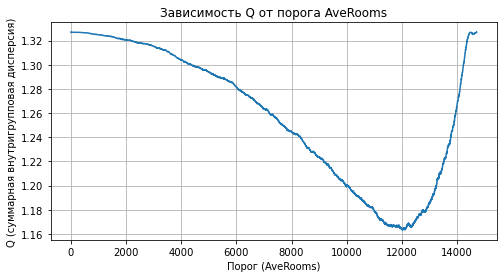

In [14]:
# ваш код здесь
# график
plt.figure(figsize=(8, 4))
plt.plot(Qs)
plt.xlabel('Порог (AveRooms)')
plt.ylabel('Q (суммарная внутригрупповая дисперсия)')
plt.title('Зависимость Q от порога AveRooms')
plt.grid(True)
plt.show()

Чем меньше Q, тем лучше. 

При каком приблизительно значении порога достигается минимум Q?

Теперь повторите процедуру вычисления Q для каждого признака.

Чтобы было удобно сравнивать значение Q для разных признаков, отобразите все графики на одном рисунке.

Комментарий: множество значений у каждого признака своё, поэтому будем откладывать по оси x просто числа от 0 до длины выборки. Величину оптимального порога по графику будет определить невозможно, зато вы сможете определить оптимальный признак для разбиения.

C:\Users\Rashid\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


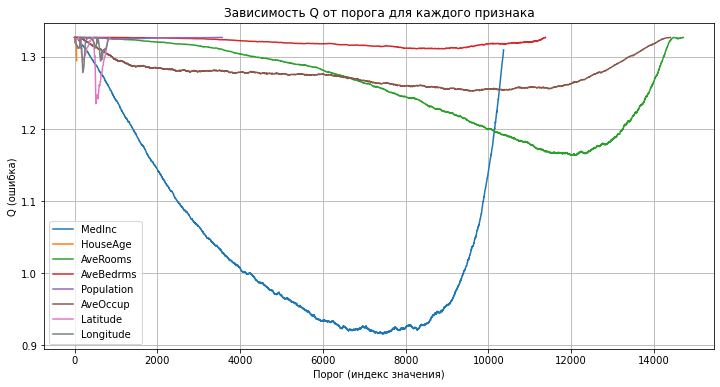

In [15]:
Qs_by_feature = {}  # словарь: признак -> список Q

for feature in X_train.drop(columns=['target']).columns:  # исключаем target из признаков
    X_train.sort_values(feature, inplace=True)
    Qs = []
    thresholds = X_train[feature].unique()
    
    for threshold in thresholds:
        # Разделяем target по условию
        left_target = X_train[X_train[feature] <= threshold]['target']
        right_target = X_train[X_train[feature] > threshold]['target']
        
        # проверка на пустые группы
        if len(left_target) == 0 or len(right_target) == 0:
            Qs.append(np.nan)
            continue
        
        # дисперсии по target
        left_disp = np.var(left_target)
        right_disp = np.var(right_target)
        
        # взвешенная сумма дисперсий
        Q = (len(left_target) * left_disp + len(right_target) * right_disp) / \
            (len(left_target) + len(right_target))
        Qs.append(Q)
    
    Qs_by_feature[feature] = Qs

# Построение графиков
plt.figure(figsize=(12, 6))

for feature, Qs in Qs_by_feature.items():
    plt.plot(range(len(Qs)), Qs, label=feature)

plt.xlabel("Порог (индекс значения)")
plt.ylabel("Q (ошибка)")
plt.title("Зависимость Q от порога для каждого признака")
plt.legend()
plt.grid(True)
plt.show()


Для разбиения по какому признаку достигается наименьшее значение критерия Q?

Нарисуйте для него график отдельно (уже с его осью значений порога).

In [16]:
# ваш код здесь

Вычислите оптимальное значение порога.

In [17]:
# ваш код здесь

Нарисуйте выборку в осях найденного признака и таргета и отобразите на графике порог, по которому выполняется разбиение.

In [18]:
# ваш код здесь

Какой вывод можно сделать из визуального анализа последнего графика?

|

|

|

|

|

|

|

|

|

|

|

# Проверьте своё решение

Разбейте данные на тренировочную и тестовую части. В тестовую часть отправьте четверть всех данных. Зафиксируйте random_state при разбиении.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

Чтобы было удобно сортировать объекты вместе с целевой переменной, 
допишем target в таблицу X_train.

In [20]:
X_train["target"] = y_train

C:\Users\Rashid\AppData\Local\Temp/ipykernel_15740/534846036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["target"] = y_train


Возьмём для примера признак AveRooms и подберём для него оптимальный порог.

Для удобства перебора порога отсортируем по этому признаку таблицу.

In [21]:
X_train.sort_values("AveRooms", inplace=True)

In [22]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5916,2.8750,46.0,0.846154,0.846154,24.0,1.846154,34.28,-118.44,1.625
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.375
17820,1.0938,20.0,1.130435,1.043478,120.0,1.739130,37.37,-121.90,1.875
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11,1.250
4552,1.0769,52.0,1.260870,1.163043,171.0,1.858696,34.04,-118.24,1.125


Переберите в цикле все возможные пороги для разбиения тренировочных данных по признаку AveRooms.

Для каждого разбиения необходимо вычислить ошибку Q: сначала для правого и левого поддеревьев вычисляем критерий информативности (дисперсию таргета), затем складываем полученные значения с весами.

In [23]:
Qs = [] # список ошибок для каждого порога

for i in range(X_train.shape[0]):
    qual = X_train["target"][:i].std()**2 * i/X_train.shape[0] + \
    X_train["target"][i:].std()**2 * (1-i/X_train.shape[0])
    Qs.append(qual)

In [24]:
len(Qs)

15480

Нарисуйте график зависимости Q от порога.

Text(0, 0.5, 'Q')

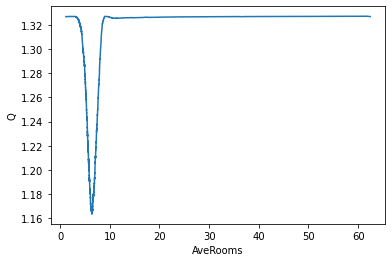

In [25]:
plt.plot(X_train["AveRooms"], Qs)
plt.xlabel("AveRooms")
plt.ylabel("Q")

Чем меньше Q, тем лучше. 

При каком приблизительно значении порога достигается минимум Q?

Теперь повторите процедуру вычисления Q для каждого признака.

Чтобы было удобно сравнивать значение Q для разных признаков, отобразите все графики на одном рисунке.

Комментарий: множество значений у каждого признака своё, поэтому будем откладывать по оси x просто числа от 0 до длины выборки. Величину оптимального порога по графику будет определить невозможно, зато вы сможете определить оптимальный признак для разбиения.

C:\Users\Rashid\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


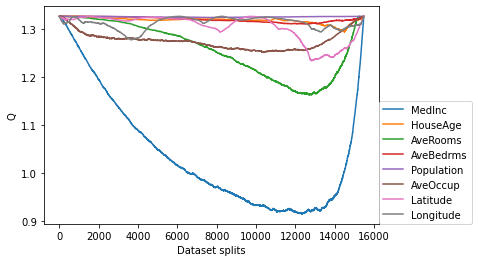

In [26]:
for feat in X_train.columns[:-1]:
    Qs = []
    X_train.sort_values(feat, inplace=True)
    for i in range(X_train.shape[0]):
        qual = X_train["target"][:i].std()**2 * i/X_train.shape[0] + X_train["target"][i:].std()**2 * (1-i/X_train.shape[0])
        Qs.append(qual)
    plt.plot(Qs, label=feat)
plt.xlabel("Dataset splits")
plt.ylabel("Q")
plt.legend(loc=(1, 0))

Для разбиения по какому признаку достигается наименьшее значение критерия Q?

Нарисуйте для него график отдельно (уже с его осью значений порога).

Text(0, 0.5, 'Q')

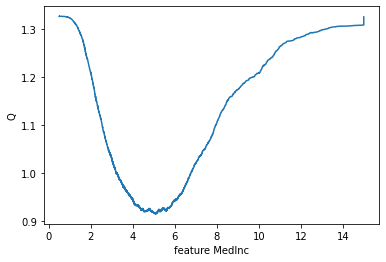

In [27]:
ftr = "MedInc"
Qs = []
X_train.sort_values(ftr, inplace=True)
for i in range(X_train.shape[0]):
    qual = X_train["target"][:i].std()**2 * i/X_train.shape[0] + \
    X_train["target"][i:].std()**2 * (1-i/X_train.shape[0])
    Qs.append(qual)
plt.plot(X_train[ftr], Qs)
plt.xlabel("feature "+ftr)
plt.ylabel("Q")

Вычислите оптимальное значение порога.

In [28]:
mask = np.logical_not(np.isnan(Qs))
Qs = np.array(Qs)[mask]
threshs = X_train[ftr].values[mask]

threshs[np.argmin(Qs)]

5.0858

Нарисуйте выборку в осях найденного признака и таргета и отобразите на графике порог, по которому выполняется разбиение.

Text(0, 0.5, 'Target')

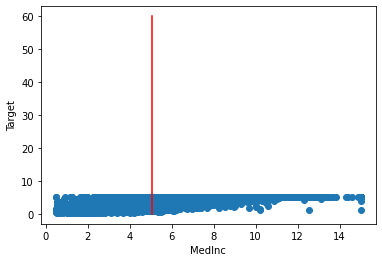

In [30]:
thresh = threshs[np.argmin(Qs)]
plt.scatter(X_train["MedInc"], X_train["target"])
plt.plot([thresh, thresh], [0, 60], color="red")
plt.xlabel("MedInc")
plt.ylabel("Target")

Из визуального анализа последнего графика понятно, что большинство значений таргета слева от разбивающей прямой меньше, чем большинство значений таргета справа от разбивающей прямой. То есть разбиение разумно делит объекты.